# Introduction to Data Science using Python

This notebook is a quick introduction to data science intended for beginners - no programming experience is necessary! All functions and methods will be explained - and there's always google. <br>
<br>
We will introduce several key concepts of the process: <br>
1) data cleansing - filling in missing values, manipulating values, setting up columns <br>
2) data exploration - understanding the data, variable types <br>
3) prediction - split into training/test sets, building the model, importance of variables <br>
4) visualization <br>

## 1. Introduction to the Dataset

In this notebook, we will be using the titanic dataset to familiarize ourselves with the data science process. This titanic dataset is commonly used as an introduction; check out Kaggle if you are interested in other ways people have analyzed this dataset. <br>

Our goal is to understand what factors led to an individual's likelihood of survival. Can we predict what if someone will survive based on his/her sex, class, cabin location, fare, family members .... ?

### 1.1 Load Data
Before loading our data into Python, we need to load several Python packages. These should come pre-installed with your Anaconda installation. <br>

For data analysis and wrangling: <br>
Pandas provides fast, flexible and expressive data structures designed to make working with "relational" or "labeled" data easy. We can acquire the data into Panda dataframes that enable us to easily run operations. <br>
NumPy is the fundamental package for scientific computing with Python. <br>
Random implements pseudo-random number generators for various distributions. <br>

For visualization:<br>
Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.<br>
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes.<br>

For modeling:<br>
sklearn: scikit-learn is for Machine Learning in Python. It has simple and efficient tools for data mining and data analysis, including classification, regression, clustering, dimensionality reduction, model selection, preprocessing.<br>
Ipython utilizes the public API for display tools in Python.


In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns 
import matplotlib.pyplot as plt

#building a model
from sklearn import linear_model, cross_validation, metrics
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Image

# https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline

# for clean output 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data from https://www.kaggle.com/c/titanic
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

### 1.2 Descriptive Statistics and Basic Commands
This section will provide commands to better understand the data. What are our variables? How old are the passengers? What kind of passengers are on board? How many families are on the Titanic? How much did people pay for their ticket?

In [3]:
# print the columns of our training dataset
print(titanic_train.columns)

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [4]:
# look at the first few lines of the training dataset
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# get exploratory statistics
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# only look at certain columns
titanic_train[["Survived", "Pclass", "Name", "Age"]].head()

,Survived,Pclass,Name,Age
0,0,3,"Braund, Mr. Owen Harris",22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,1,3,"Heikkinen, Miss. Laina",26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,0,3,"Allen, Mr. William Henry",35.0


In [7]:
# delete the PassengerId column
del titanic_train["PassengerId"]

### 1.3 Subsetting the data
Subsetting the data, or choosing certain columns/rows of the data, is important for analyzing specific groups. Here, we show different ways to look at certain rows.

In [8]:
# look at data values of students who have survived
titanic_train.loc[titanic_train["Survived"] == 1].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# can also subset the data by looking at if strings contain a certain word
titanic_train.loc[titanic_train["Name"].str.contains("Futrelle")].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
137,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S


In [10]:
# look at Survived, Sex columns, group by the sex and find the mean survival rate
sex_stats = titanic_train[["Survived", "Sex"]].groupby(['Sex']).mean()
print(sex_stats)

        Survived
Sex             
female  0.742038
male    0.188908


### 1.4 Data Visualization

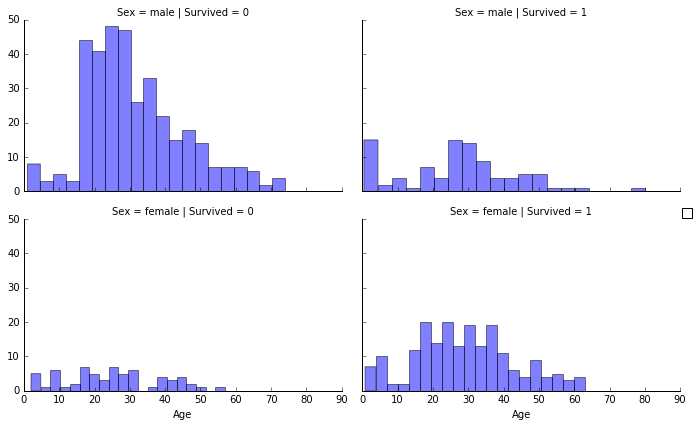

In [11]:
# use seaborn package to visualize the data
# FacetGrid forms a matrix of panels defined by row and column facetting variables
# analyze sex vs survived? based on age
grid = sns.FacetGrid(titanic_train, col='Survived', row='Sex', size=3.0, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

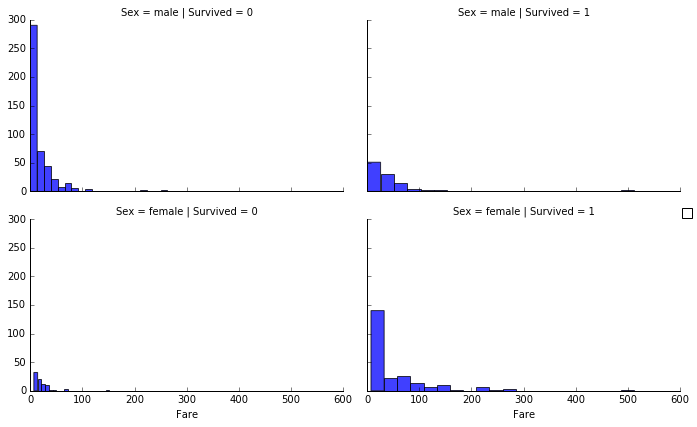

In [12]:
# analyze sex vs survived? based on fare
grid = sns.FacetGrid(titanic_train, col='Survived', row='Sex', size=3.0, aspect=1.6)
grid.map(plt.hist, 'Fare', alpha=.75, bins=20)
grid.add_legend()

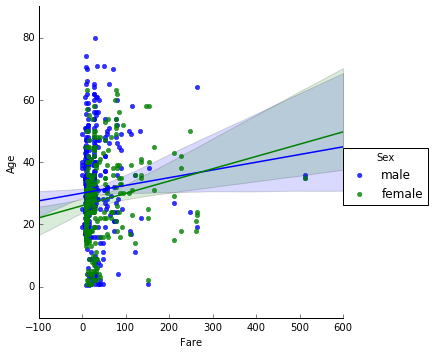

In [13]:
# lmplots combines regplot() and FacetGrid. convenient interface to fit regression models across conditional subsets of a dataset
# analyze relationship between fare, age, sex
sns.lmplot(x="Fare", y="Age",  data=titanic_train, hue="Sex")

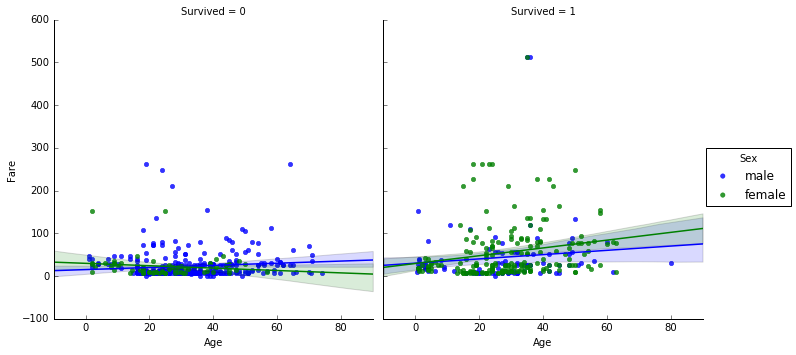

In [14]:
# now display two grids, showing no survival and survival
sns.lmplot(y="Fare", x="Age",  data=titanic_train, hue="Sex", col="Survived")

## 2. Data Cleansing

In [15]:
# cleaning data, handling nulls
# could set titanic_train to this to ignore any that have null values
titanic_train.loc[~pd.isnull(titanic_train["Age"])] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [16]:
# way to handle null numeric values
# set null values as the mean of all ages
titanic_train.loc[pd.isnull(titanic_train["Age"]), "Age"] = np.mean(titanic_train["Age"])

In [17]:
# Is the individual male?
# Create a new column to see if he is
# create new column args = (cond, if case, else case)
titanic_train["IsMale"] = np.where(titanic_train["Sex"] == "male", 1, 0)

# does the cabin letter matter?
# create new columns to see which cabin individual was in
# this way, we can also create counts to see how many people were in each cabin who survived
for i in ["A", "B", "C", "D", "E", "F", "G"]:
    titanic_train["Cabin"+i] = np.where(titanic_train["Cabin"].str[0] == i, 1, 0)

In [18]:
#print the first few columns of our dataset
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale,CabinA,CabinB,CabinC,CabinD,CabinE,CabinF,CabinG
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,0,0,0


## 3. Modeling

In [19]:
# Perform logistic regression
# https://en.wikipedia.org/wiki/Logistic_regression
X = titanic_train[["IsMale", "Fare", "Age"]]
Y = titanic_train["Survived"]
logreg = linear_model.LogisticRegression()
predicted = cross_validation.cross_val_predict(logreg, X, Y)
print(metrics.accuracy_score(Y, predicted))

0.7822671156


In [20]:
X = titanic_train[["IsMale"]]
Y = titanic_train["Survived"]
logreg = linear_model.LogisticRegression()
predicted = cross_validation.cross_val_predict(logreg, X, Y)
print(metrics.accuracy_score(Y, predicted))

0.786756453423


In [21]:
# scaling / normalization
X = titanic_train[["IsMale", "Fare", "Age"]]
Y = titanic_train["Survived"]
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
logreg = linear_model.LogisticRegression()
predicted = cross_validation.cross_val_predict(logreg, X, Y)
print(metrics.accuracy_score(Y, predicted))

0.789001122334


In [22]:
# scaling / normalization
X = titanic_train[["IsMale", "Fare", "Age", "Pclass","SibSp", "Parch"]]
Y = titanic_train["Survived"]
rf_classifier = RandomForestClassifier()
predicted = cross_validation.cross_val_predict(rf_classifier, X, Y)
print(metrics.accuracy_score(Y, predicted))

0.796857463524


In [23]:
# scaling / normalization
# https://en.wikipedia.org/wiki/Random_forest
X = titanic_train[
    ["IsMale", "Fare", "Age", "Pclass",
     "SibSp", "Parch", "CabinA", "CabinB", 
     "CabinC", "CabinD", "CabinE", "CabinF", "CabinG"]
    ]
Y = titanic_train["Survived"]
rf_classifier = RandomForestClassifier()
predicted = cross_validation.cross_val_predict(rf_classifier, X, Y)
print(metrics.accuracy_score(Y, predicted))

0.799102132435
